In [1]:
# Link: https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [ ]:
# Load the Dataset

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('AltabaInc.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-04-14,1.411458,1.432292,1.348958,1.369792,1.369792,10651200
1997-04-15,1.375000,1.421875,1.291667,1.304688,1.304688,14208000
1997-04-16,1.291667,1.348958,1.270833,1.304688,1.304688,16086400
1997-04-17,1.312500,1.401042,1.302083,1.351563,1.351563,10315200
1997-04-18,1.380208,1.390625,1.281250,1.291667,1.291667,10238400


In [4]:
#Visualize the per day closing price of the stock.

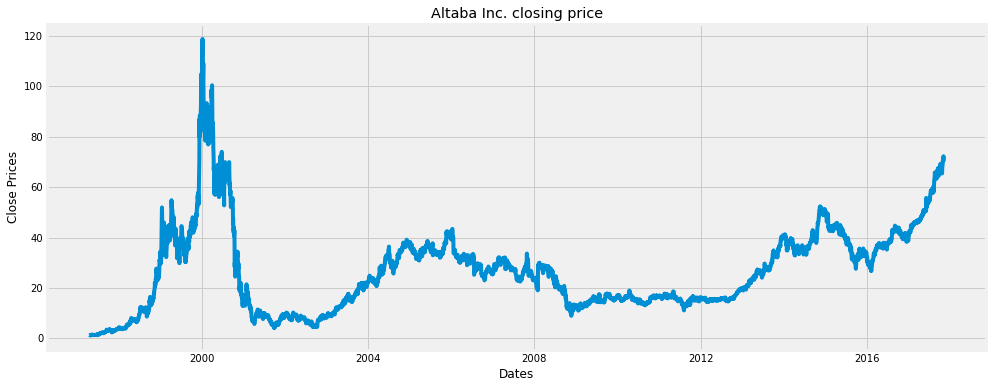

In [6]:
#plot close price
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

In [7]:
#Lets us plot the scatterplot

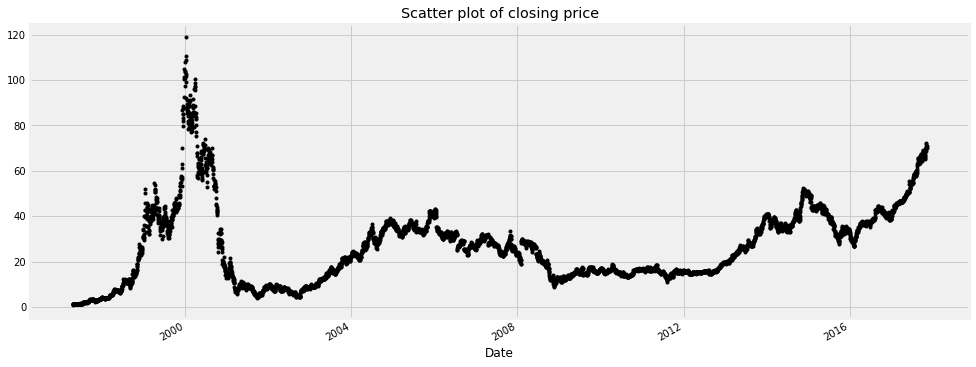

In [9]:
plt.figure(figsize=(15,6))
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

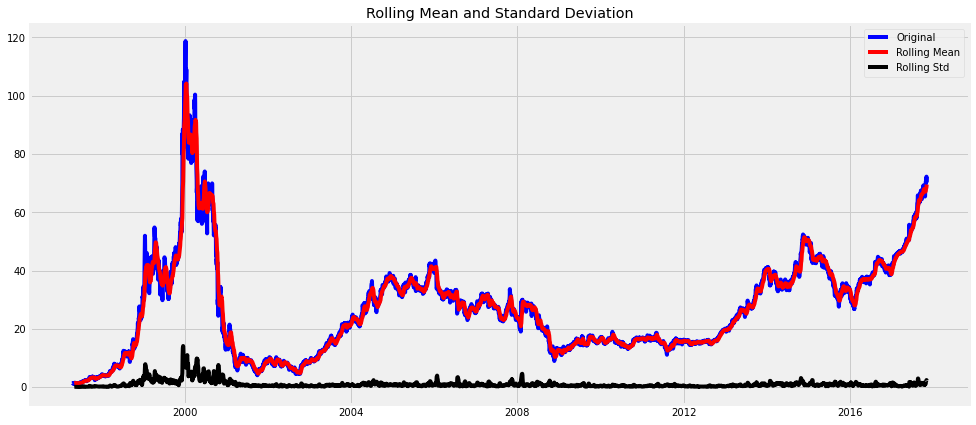

Results of dickey fuller test
Test Statistics                  -2.160693
p-value                           0.220820
No. of lags used                 32.000000
Number of observations used    5148.000000
critical value (1%)              -3.431621
critical value (5%)              -2.862102
critical value (10%)             -2.567069
dtype: float64


In [13]:
#Test for staionarity
plt.figure(figsize=(15,7))
def test_stationarity(timeseries):
    #Determing rolling statistics ( It is also known as 'Moving Average'  )
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

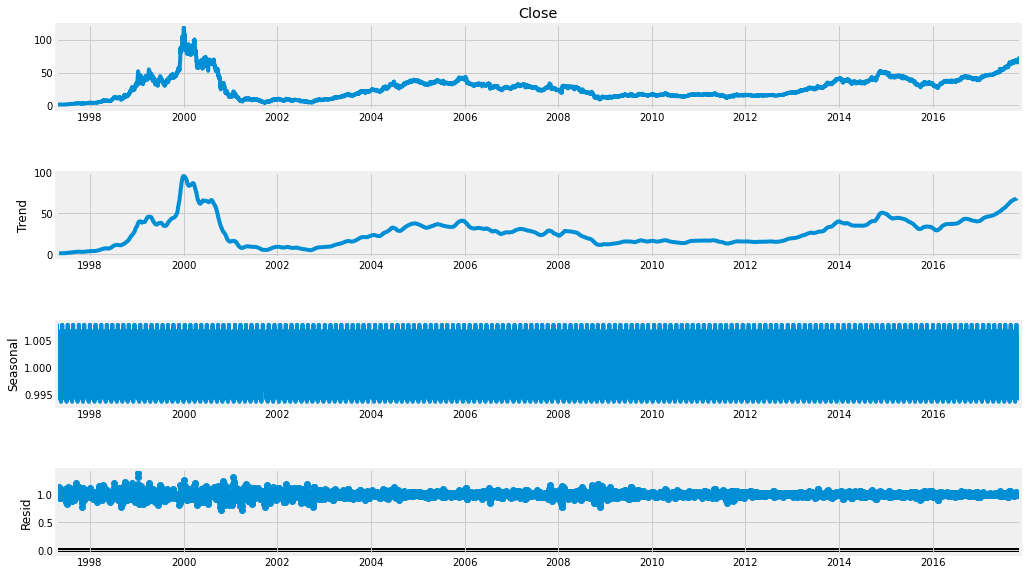

In [14]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


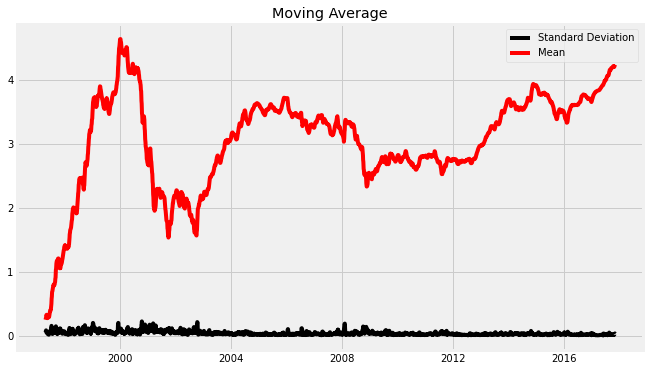

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

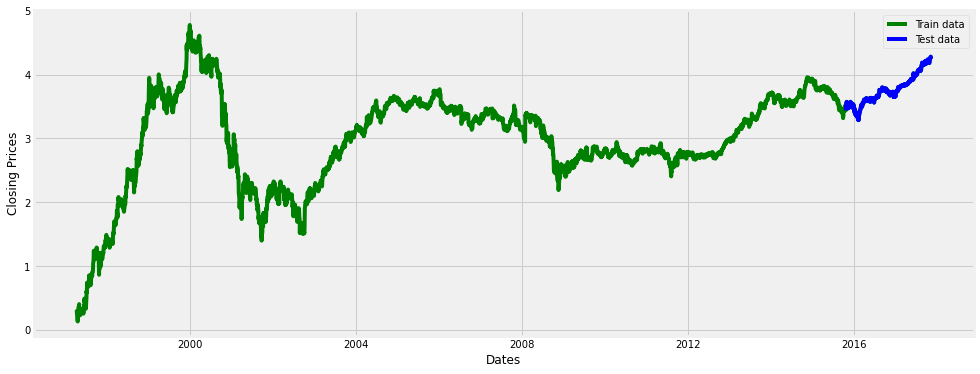

In [17]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [20]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-17740.036, BIC=-17727.143, Time=1.020 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-17738.302, BIC=-17718.963, Time=1.640 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-17738.335, BIC=-17718.996, Time=0.690 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-17740.353, BIC=-17733.906, Time=0.160 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-17744.340, BIC=-17718.555, Time=2.910 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-17751.041, BIC=-17718.809, Time=1.830 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-17749.838, BIC=-17724.053, Time=4.300 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=-17749.491, BIC=-17710.813, Time=0.990 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-17750.180, BIC=-17711.502, Time=1.800 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-17751.074, BIC=-17718.843, Time=1.540 seco

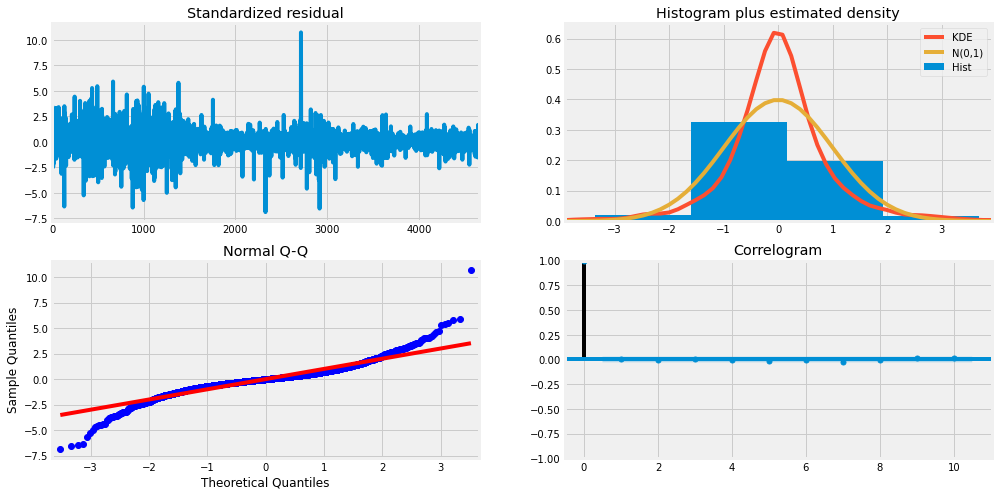

In [21]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [22]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4658
Model:                 ARIMA(3, 1, 2)   Log Likelihood                8881.722
Method:                       css-mle   S.D. of innovations              0.036
Date:                Fri, 29 May 2020   AIC                         -17749.443
Time:                        14:40:25   BIC                         -17704.319
Sample:                             1   HQIC                        -17733.571
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.001      1.311      0.190      -0.000       0.002
ar.L1.D.Close    -1.5496      0.101    -15.327      0.000      -1.748      -1.351
ar.L2.D.Close    -0.8371      0.097     

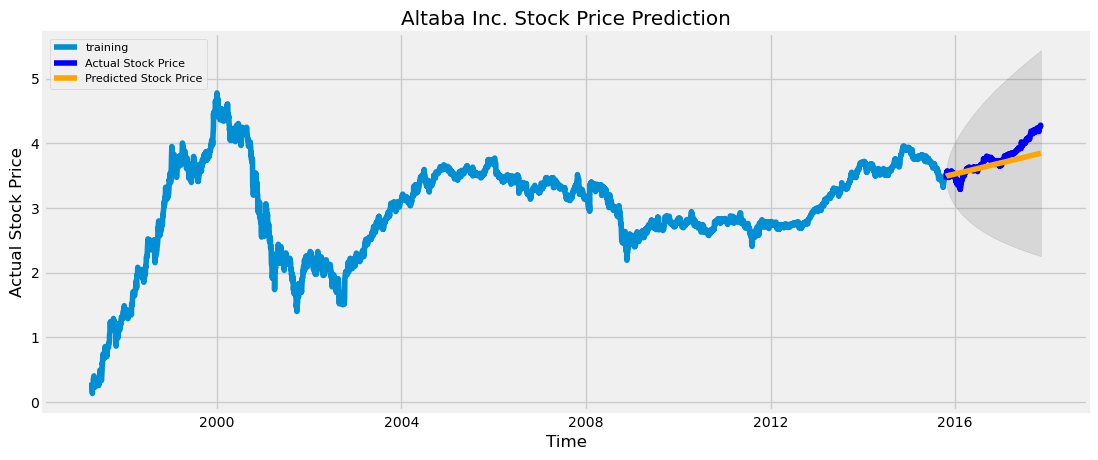

In [24]:
# Forecast
fc, se, conf = fitted.forecast(519, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.027960476693660127
MAE: 0.1212756286387342
RMSE: 0.1672138651358198
MAPE: 0.03096172630350942


Around 3.5% MAPE(Mean Absolute Percentage Error) implies the model is about 96.5% accurate in predicting the test set observations.

Congratulations. Now you know how to build an ARIMA model for stock price forecasting.

Conclusion

 
In this article, the data has been collected from kaggle.com. The historical data from the year 1996 to 2017 were taken in to account for analysis. The BoxJenkins methodology(ARIMA model) is trained and predicted the stock prices on the test dataset.

Well, that’s all for this article hope you guys have enjoyed reading this it, feel free to share your comments/thoughts/feedback in the comment section.